# ***의료보험 비용 데이터를 통한 분석***

## 신체적, 지리적, 사회적 여건에 따라 어떻게 발생하는지 분석

In [12]:
import pandas as pd
import numpy as np

In [30]:
# 경고 메세지 무시하기

import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/insurance.csv")

In [14]:
data.shape

(1338, 7)

In [15]:
# charges : 보험료
# region : 피보험자가 사는 지역
# children : 부양하는 아이 숫자 ? 무슨 칼럼인지 잘 모르겠음.

In [16]:
from IPython.display import Image

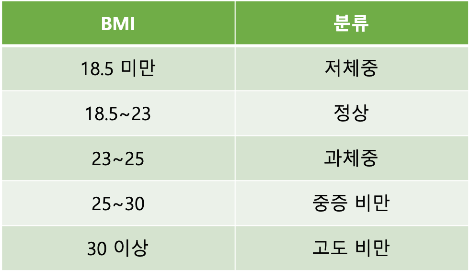

In [17]:
# bmi 치수 기준표

Image("C:/Users/joyh1/Desktop/bmi.png")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### - 성별에 따른 의료보험 요금에 대해 분석해보자

In [24]:
# groupby를 이용해 성별에 따른 의료보험 비용 평균값을 나타내보자
sex_charge =data.groupby(['sex'])['charges'].mean()

In [28]:
# pd.DataFrame을 이용해서 성별에 따른 의료보험 요금 평균을 데이터프레임으로 만들고 ggplot을 이용해 bar 그래프로 나타내기
import matplotlib.pyplot as plt
from plotnine import * 
plt.rc("font",family="Malgun Gothic")

In [32]:
df_sex_charge = pd.DataFrame(sex_charge).reset_index()
df_sex_charge.columns = ['성별', '평균비용']
df_sex_charge

,성별,평균비용
0,female,12569.578844
1,male,13956.751178


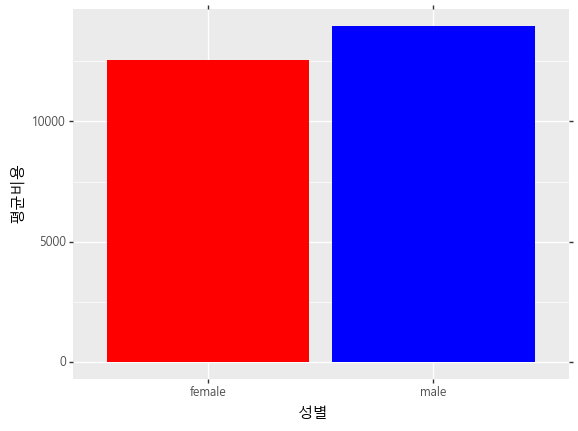

<ggplot: (-9223371900431494961)>

In [33]:
(ggplot(df_sex_charge)
 +aes(x='성별', y='평균비용')                    # 성별로 색깔 다르게 하기
 +geom_bar(stat='identity', position='dodge', fill=('red','blue'))
 +theme(text=element_text(family="Malgun Gothic"))
)

In [34]:
# 다른 분석을 해보기 위해 데이터 다시 살펴보기
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Bmi 기준에 따른 보험 평균비용 분석

In [35]:
# bmi 기준표를 기준으로 data속 bim 수치를 저체중~고도비만 별로 나누어 분류해보자

# 새로운 비만정도 칼럼 추가
data['비만정도'] = ""

In [42]:
data.loc[data['bmi'] < 18.5, '비만정도'] = '저체중'
data.loc[(data['bmi'] > 18.5) & (data['bmi'] < 23), '비만정도'] = '정상'
data.loc[(data['bmi'] >= 23) & (data['bmi'] < 25), '비만정도'] = '과체중'
data.loc[(data['bmi'] >= 25) & (data['bmi'] < 30), '비만정도'] = '중증비만'
data.loc[data['bmi'] >= 30, '비만정도'] = '고도비만'

In [43]:
data.head()

,age,sex,bmi,children,smoker,region,charges,비만정도
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만
1,18,male,33.770,1,no,southeast,1725.55230,고도비만
2,28,male,33.000,3,no,southeast,4449.46200,고도비만
3,33,male,22.705,0,no,northwest,21984.47061,정상
4,32,male,28.880,0,no,northwest,3866.85520,중증비만


In [44]:
# seaborn을 이용하기
import seaborn as sns

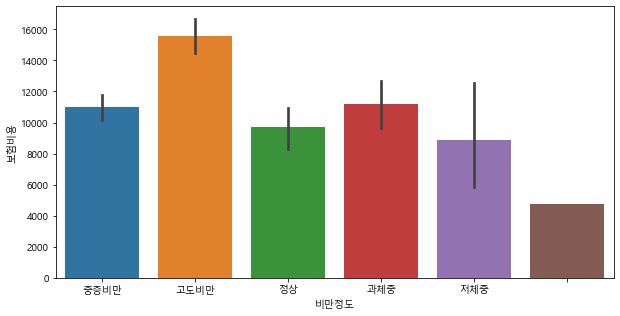

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='비만정도', y='보험비용')

# 고도비만 > 중증비만 > 과체중 > 정상 > 저체중 순서
# 고도비만 일수록 질병이 더 발생함에 따라 의료보험 비용이 가장 높은 것으로 나타내진다. 
# 그리고 중증비만과 과체중 거의 비슷함 
# 저체중으로 인한 의료보험 비용이 젤 낮은걸로 나옴

# 따라서 저체중 보다는 비만으로 인한 성인병같은 질병이 의료보험 비용을 높일 것으로 추측


In [83]:
data.isnull().sum()

나이      0
성별      0
bmi     0
자녀수     0
흡연여부    0
거주지역    0
보험비용    0
비만정도    0
연령대     0
dtype: int64

In [50]:
## 잠시 Raw data의 칼럼을 모두 한국어로 바꿔주자
data.columns = ['나이','성별','bmi','자녀수','흡연여부','거주지역','보험비용','비만정도']
data.head()

,나이,성별,bmi,자녀수,흡연여부,거주지역,보험비용,비만정도
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만
1,18,male,33.770,1,no,southeast,1725.55230,고도비만
2,28,male,33.000,3,no,southeast,4449.46200,고도비만
3,33,male,22.705,0,no,northwest,21984.47061,정상
4,32,male,28.880,0,no,northwest,3866.85520,중증비만


## 나이에 따른 보험비용 분석

In [52]:
# 나이를 범주화 하기 위해서 나이 value의 최소, 최댓값을 구하고 범위 기준을 세워보자
data['나이'].min()

18

In [53]:
data['나이'].max()

64

In [55]:
# 최소연령이 18세, 최대연령이 64세이므로 8살씩 차이로 끊어서 분류해보자
# 18세이상 25세이하 / 26세이상 33세이하 / 34세이상 41세이하 / 42세이상 49세이하/ 50세이상 57세이하 / 58세이상 64세이하

In [57]:
data['연령대'] = ''

In [77]:
data.loc[(data['나이'] >= 18) & (data['나이'] < 26), '연령대'] = '18세이상 25세이하'
data.loc[(data['나이'] >= 26) & (data['나이'] < 34), '연령대'] = '26세이상 33세이하'
data.loc[(data['나이'] >= 34) & (data['나이'] < 42), '연령대'] = '34세이상 41세이하'
data.loc[(data['나이'] >= 42) & (data['나이'] < 50), '연령대'] = '42세이상 49세이하'
data.loc[(data['나이'] >= 50) & (data['나이'] < 58), '연령대'] = '50세이상 57세이하'
data.loc[(data['나이'] >= 58) & (data['나이'] < 64), '연령대'] = '58세이상 64세이하'
data.loc[data['나이'] >= 64, '연령대'] = '64세이상'

In [78]:
data.head()

,나이,성별,bmi,자녀수,흡연여부,거주지역,보험비용,비만정도,연령대
0,19,female,27.900,0,yes,southwest,16884.92400,중증비만,18세이상 25세이하
1,18,male,33.770,1,no,southeast,1725.55230,고도비만,18세이상 25세이하
2,28,male,33.000,3,no,southeast,4449.46200,고도비만,26세이상 33세이하
3,33,male,22.705,0,no,northwest,21984.47061,정상,26세이상 33세이하
4,32,male,28.880,0,no,northwest,3866.85520,중증비만,26세이상 33세이하


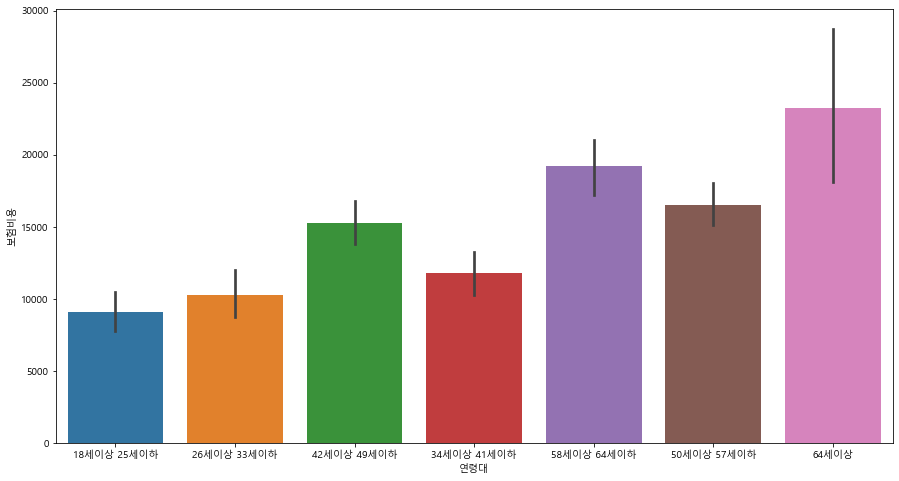

In [79]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='연령대', y='보험비용')

# 나이가 고령자로 갈수록 의료보험 비용이 높아진다. 
# 반대로 의료보험 비용이 가장 낮은 연령은 18세이상 25세 이하로 가장 어린 연령대이다.